## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path  = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results  = pd.read_csv(study_results_path)

# Combine the data into a single dataset
StudyDf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
StudyDf.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
MiceNumber    = len(StudyDf["Mouse ID"].unique())
MiceNumberDf = pd.DataFrame({"Total Mice": [MiceNumber]})
MiceNumberDf

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MiceDup = StudyDf[StudyDf.duplicated(['Mouse ID', 'Timepoint'])]
MiceDup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
MiceDupID = MiceDup.drop_duplicates()
MiceDupID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MiceClean     = StudyDf.loc[StudyDf['Mouse ID'] != 'g989']
MiceClean_df  = pd.DataFrame(MiceClean)
MiceClean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
MC_Number = MiceClean_df["Mouse ID"].value_counts()
# MC_Number = pd.DataFrame(MC_Number)
MC_Number

u196    10
x402    10
l661    10
y163    10
c139    10
        ..
l872     1
h428     1
b447     1
t573     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

# Regimen
Summary = pd.DataFrame(StudyDf.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in Summary

Summary["Mean"]     = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
Summary["Median"]   = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
Summary["Standard Deviation"] = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
Summary["Variance"] = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
Summary["SEM"]      = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
Summary = Summary[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
Summary = Summary.rename(columns = {"Mouse ID" : "Trials"})

Summary.head()


,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar Plots

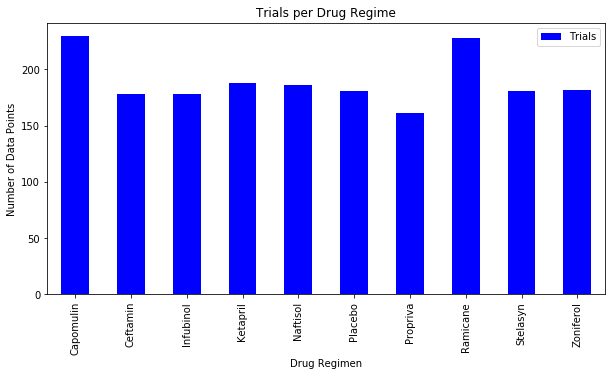

<Figure size 432x288 with 0 Axes>

In [247]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Filter the DataFrame down only to those columns to chart
Data = Summary[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
Data.plot(kind="bar", color = "b", figsize=(10,5), legend = 'best')

# Set a title for the chart
plt.title("Trials per Drug Regime")
plt.ylabel("Number of Data Points")
plt.show()
# plt.tight_layout()
plt.savefig('Data points by Drug')

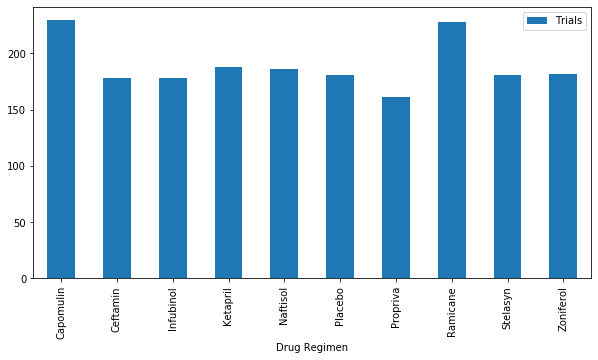

In [248]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
Bar_plot = Data.plot(kind="bar", figsize=(10,5))

## Pie Plots

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [112]:




# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [113]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
